# **IRIS FLOWER CLASSIFICATION**

In [53]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/IRIS.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

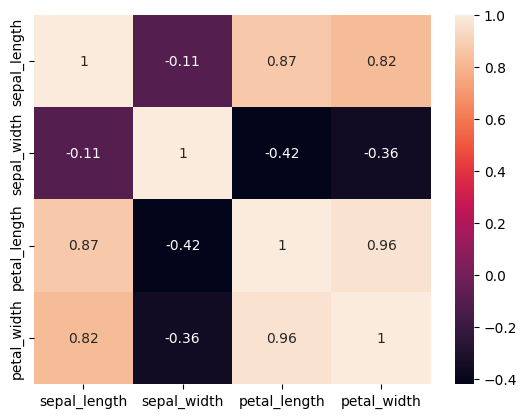

In [55]:
## Checking Correlation among indep. features
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

num_col = [i for i in df.columns if df[i].dtype!='object']
corr_matrix = df[num_col].corr()
sns.heatmap(corr_matrix, annot=corr_matrix.values)

Observation: Very high collinearity b/w length and width of both petal and sepal

In [56]:
## Check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [57]:
## Check for balancedness of dataset
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Observation: Perfectly Balanced Dataset

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1)
Y = df['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=10)
## Converting to dataframes, for easier procesing
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [59]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
24,4.8,3.4,1.9,0.2
61,5.9,3.0,4.2,1.5


## Outlier Detection & Removal

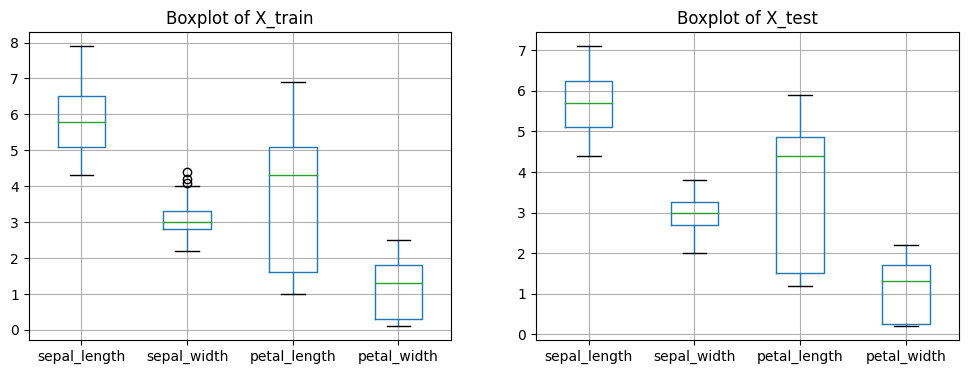

In [60]:
## Check for outliers
def check_outliers(df1, df2):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  df1.boxplot()
  plt.title(f"Boxplot of X_train")
  plt.subplot(1,2,2)
  plt.title(f"Boxplot of X_test")
  df2.boxplot();

check_outliers(X_train, X_test)

Observation: Sepal_width feature has many outliers

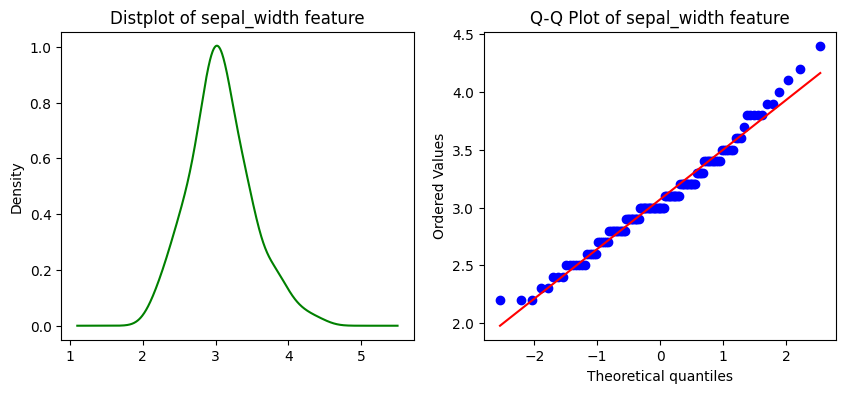

In [61]:
## Check distribution of sepal_width feature
import scipy.stats as stats
import pylab

def feature_distribution(df, feature):
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  df[feature].plot(kind='kde', color='green')
  plt.title(f"Distplot of {feature} feature")
  plt.subplot(1,2,2)
  stats.probplot(df[feature], dist='norm', plot=pylab);
  plt.title(f"Q-Q Plot of {feature} feature")

feature_distribution(X_train, 'sepal_width')

Observation: sepal_width feature seems to have almost perfect gaussian distribution

In [62]:
## Outliers imputation with upper and lower boundary
def outlier_removal(df, feature):
  upper_boundary = df[feature].mean() + (3*df[feature].std())
  lower_boundary = df[feature].mean() - (3*df[feature].std())
  print(f"Upper Boundary: {upper_boundary}, Lower Boundary: {lower_boundary}")
  df.loc[df[feature]>upper_boundary, feature] = upper_boundary
  df.loc[df[feature]<lower_boundary, feature] = lower_boundary
  print(f"Outliers sucessfully imputed with upper or lower boundary")

outlier_removal(df, 'sepal_width')

Upper Boundary: 4.354782934086521, Lower Boundary: 1.7532170659134791
Outliers sucessfully imputed with upper or lower boundary


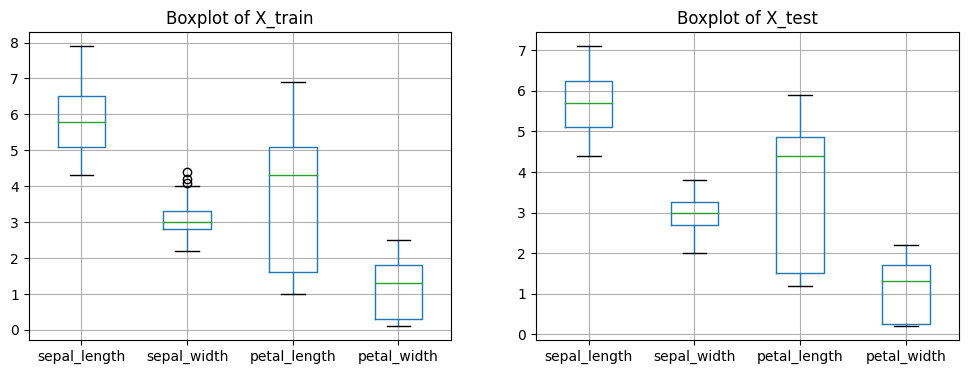

In [63]:
## Now let's again check the boxplots
check_outliers(X_train, X_test)

Note: We still can see outliers in boxplot because boxplot uses IQR Method for outlier detection, which we didn't use in our case, due to sepal_width feature's gaussian distribution. So, instead, to visualize the effects after imputing  outliers, we can use histogram

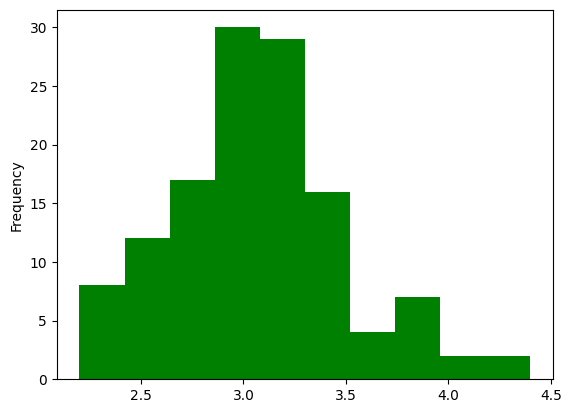

In [64]:
X_train['sepal_width'].plot(kind='hist', color='green');

Observation: As we can see, no value is higher than the upper_boundary(i.e, 4.35) or lower than than the lower boundary(i.e, 1.755). So, we can see outliers have been successfully imputed with upper or lower boundary value

## Feature Transformation

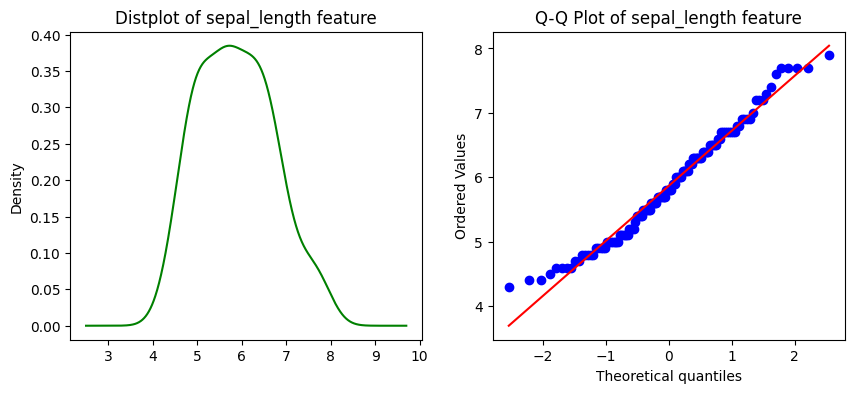

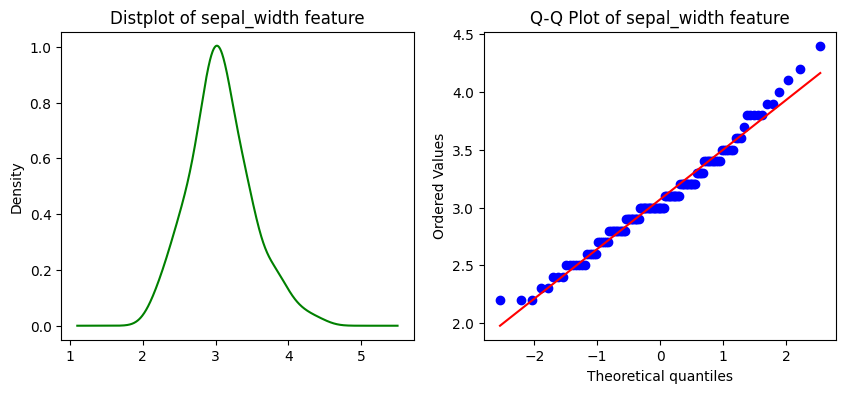

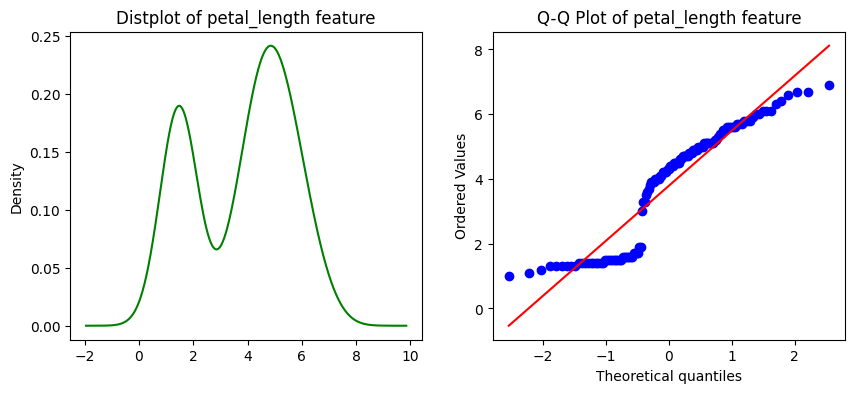

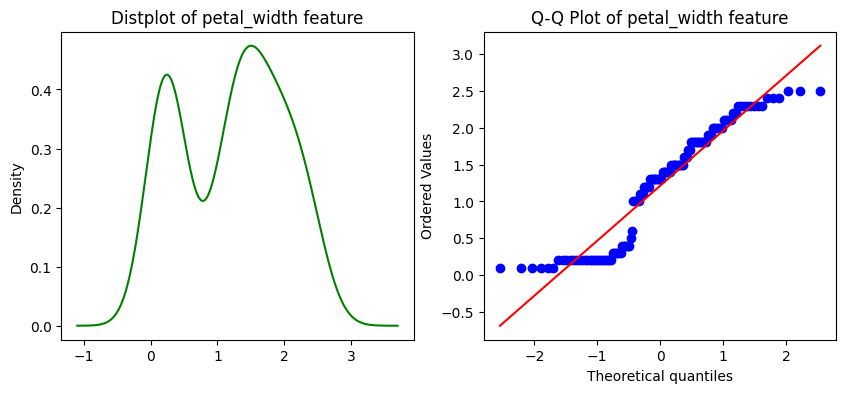

In [65]:
## Check distribution of columns
num_cols = [i for i in df.columns if df[i].dtype!='object']
for i in num_cols:
  feature_distribution(X_train, i)

Observation: petal_length and petal_width columns have non-gaussian distribution

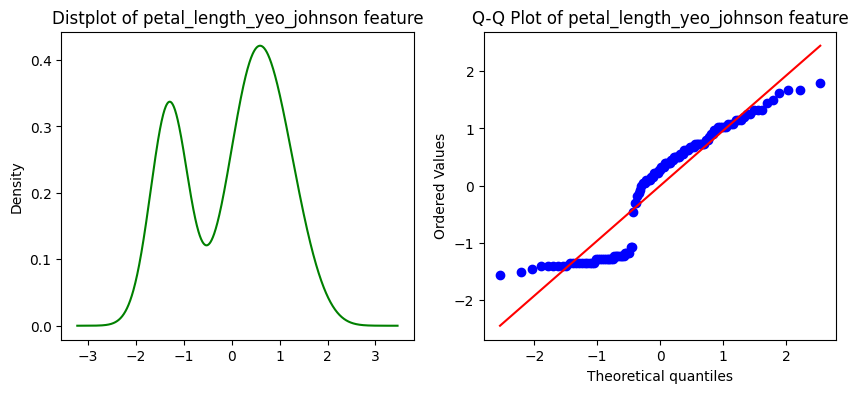

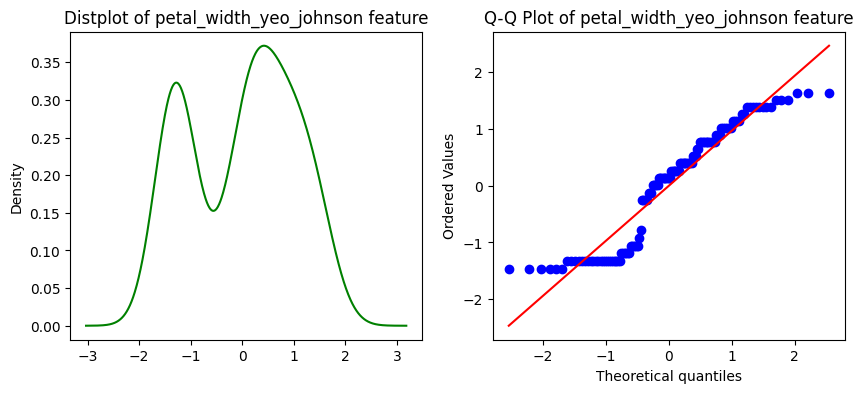

In [66]:
## Feature Transformation of X_train using Yeo Johnson Transformation
from sklearn.preprocessing import PowerTransformer

def yeo_johnson_transform_cols(df, cols_to_transform):
  pt = PowerTransformer(method='yeo-johnson', standardize=True)
  for i in cols_to_transform:
    ## reshaping columns as PowerTransformer needs a 2D array
    reshaped_col = df[i].values.reshape(-1,1)
    ## Apply the transformation
    df[i+"_yeo_johnson"] = pt.fit_transform(reshaped_col)
    feature_distribution(df, i+"_yeo_johnson")


cols = ['petal_length', 'petal_width']
yeo_johnson_transform_cols(df=X_train, cols_to_transform=cols)

Note: Yeo-Johnson or any other transform generally doesn't help much in case of bimodality(situation of 2 distinct peaks)

In [67]:
## Since Yeo-johnson transformation didn't help much consider dropping its columns
X_train.drop(columns=['petal_width_yeo_johnson','petal_length_yeo_johnson'], axis=1, inplace=True)

## Feature Scaling

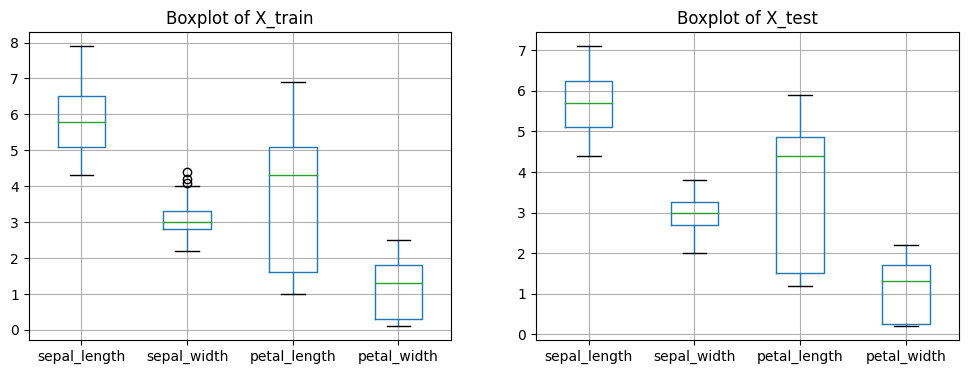

In [68]:
## Boxplot before feature scaling
check_outliers(X_train, X_test)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-1.262992,0.771365,-1.066112,-1.318908
1,0.035315,-0.166083,0.231435,0.374340


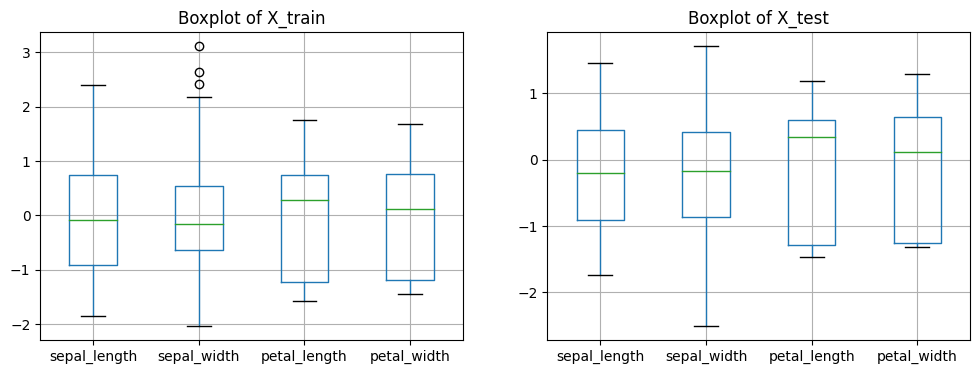

In [70]:
## Boxplot after feature scaling
check_outliers(X_train_scaled, X_test_scaled)

## Feature Encoding

In [71]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
24,4.8,3.4,1.9,0.2
61,5.9,3.0,4.2,1.5


In [74]:
# Label encoding Y_train and Y_test
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

Y_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

## Model Training

In [83]:
# Training ML Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Following is an efficient of training the model
## By the following approach,we can train multiple models at a time

models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(kernel='rbf', probability=True),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier()
}
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train_scaled, Y_train)

  ## Make prediction
  Y_train_pred = model.predict(X_train_scaled)
  Y_test_pred = model.predict(X_test_scaled)
  ## Evalaution wrt training dataset
  model_train_accuracy = accuracy_score(Y_train, Y_train_pred)
  model_train_f1 = f1_score(Y_train, Y_train_pred, average='macro')## by defalut, average='binary', which doesn't work for multiclassification
  model_train_precision = precision_score(Y_train, Y_train_pred, average='macro')
  model_train_recall = recall_score(Y_train, Y_train_pred, average='macro')
  #### Get the predicted probabilities
  Y_train_pred_proba = model.predict_proba(X_train_scaled)
  model_train_rocauc_score = roc_auc_score(Y_train, Y_train_pred_proba, multi_class='ovo' )
  ## Evaluation wrt Test data
  model_test_accuracy = accuracy_score(Y_test, Y_test_pred)
  model_test_f1 = f1_score(Y_test, Y_test_pred, average='macro') ## by defalut, average='binary', which doesn't work for multiclassification
  model_test_precision = precision_score(Y_test, Y_test_pred, average='macro')
  model_test_recall = recall_score(Y_test, Y_test_pred, average='macro')
  #### Get the predicted probabilities
  Y_test_pred_proba = model.predict_proba(X_test_scaled)
  model_test_rocauc = roc_auc_score(Y_test, Y_test_pred_proba, multi_class='ovo')

  print( "Model Name: ", list(models.keys())[i] )
  print("Model Performance for Training data")
  print("Accuracy Score: {:.4f}".format(model_train_accuracy))
  print("F1 Score: {:.4f}".format(model_train_f1))
  print("Precision Score: {:.4f}".format(model_train_precision))
  print("Recall Score: {:.4f}".format(model_train_recall))
  print("Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

  print('------------------------------------------------------')

  print("Model performance for Test Data")
  print("Accuracy Score: {:.4f}".format(model_test_accuracy))
  print("F1 Score: {:.4f}".format(model_test_f1))
  print("Precision Score: {:.4f}".format(model_test_precision))
  print("Recall Score: {:.4f}".format(model_test_recall))
  print("Roc Auc Score: {:.4f}".format(model_test_rocauc))

  print('--------------------------------------------------------')

Model Name:  Logistic Regression
Model Performance for Training data
Accuracy Score: 0.9685
F1 Score: 0.9685
Precision Score: 0.9697
Recall Score: 0.9680
Roc Auc Score: 0.9988
------------------------------------------------------
Model performance for Test Data
Accuracy Score: 1.0000
F1 Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000
Roc Auc Score: 1.0000
--------------------------------------------------------
Model Name:  Support Vector Classifier
Model Performance for Training data
Accuracy Score: 0.9764
F1 Score: 0.9764
Precision Score: 0.9769
Recall Score: 0.9762
Roc Auc Score: 0.9989
------------------------------------------------------
Model performance for Test Data
Accuracy Score: 0.9565
F1 Score: 0.9548
Precision Score: 0.9524
Recall Score: 0.9630
Roc Auc Score: 1.0000
--------------------------------------------------------
Model Name:  Random Forest Classifier
Model Performance for Training data
Accuracy Score: 1.0000
F1 Score: 1.0000
Precision Score: 1.0000
Re